In [1]:
from models.SklearnClassifier import SklearnClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import utils
import time
from Embeddings import Embeddings

# Create the embeddings object
embeddings = Embeddings('../data/doc2vec.npy', '../data/bert.npy', '../data/authors.npy', '../data/authors_encoded.npy', '../pickles/author_encoder.pkl')

# Load the feature matrix and labels
X = embeddings.get_doc2vec()
y = embeddings.get_labels()

# Scale the feature matrix
X = utils.scale_feature_matrix(X)

In [2]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Create the classifier
rf_classifier = SklearnClassifier(KNeighborsClassifier, n_jobs=-1)

In [4]:
# Train the classifier
start = time.time()
rf_classifier.train(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

Training time:  0.006822347640991211


In [5]:
# Evaluate the classifier
rf_classifier.evaluate(X_test, y_test)

{'Precision': 0.3997512488619994,
 'Recall': 0.2882292026234035,
 'F1': 0.2648377562414211,
 'Accuracy': 0.2882292026234035}

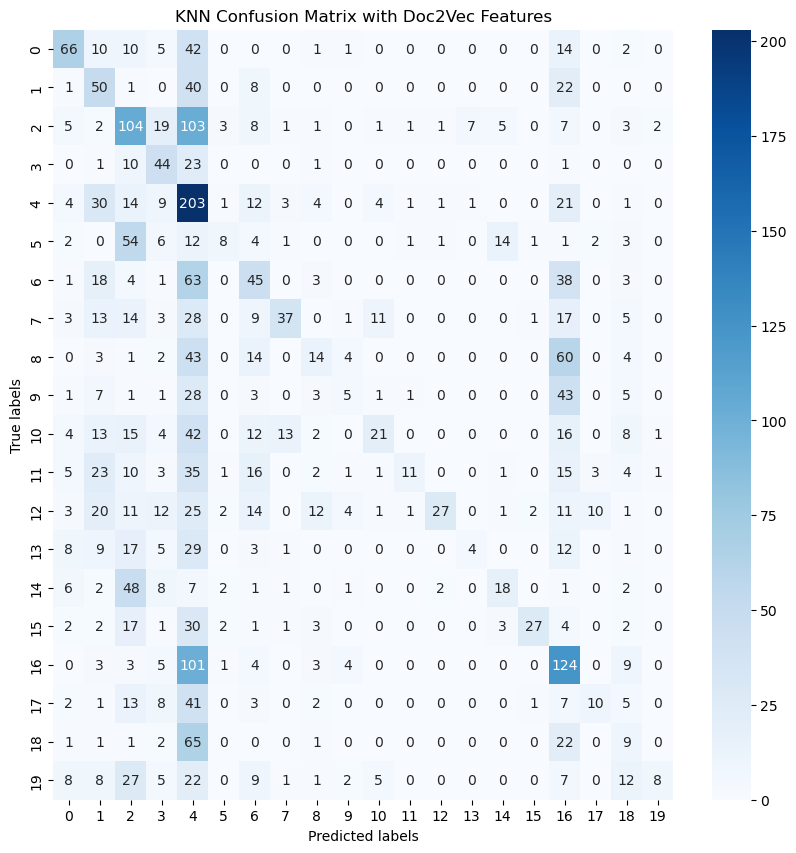

In [6]:
# Get the confusion matrix
rf_classifier.get_confusion_matrix(X_test, y_test, 'KNN Confusion Matrix with Doc2Vec Features')

In [7]:
# Create the embeddings object
embeddings = Embeddings('../data/doc2vec.npy', '../data/bert.npy', '../data/authors.npy', '../data/authors_encoded.npy', '../pickles/author_encoder.pkl')

# Load the feature matrix and labels for BERT
X = embeddings.get_bert()
y = embeddings.get_labels()

# no need to scale the feature matrix for BERT

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create the classifier
rf_classifier = SklearnClassifier(KNeighborsClassifier, n_jobs=-1)

In [10]:
# Train the classifier
start = time.time()
rf_classifier.train(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

Training time:  0.009653091430664062


In [11]:
# Evaluate the classifier
rf_classifier.evaluate(X_test, y_test)

{'Precision': 0.6932156521785162,
 'Recall': 0.6855367621677597,
 'F1': 0.6840708952460623,
 'Accuracy': 0.6855367621677597}

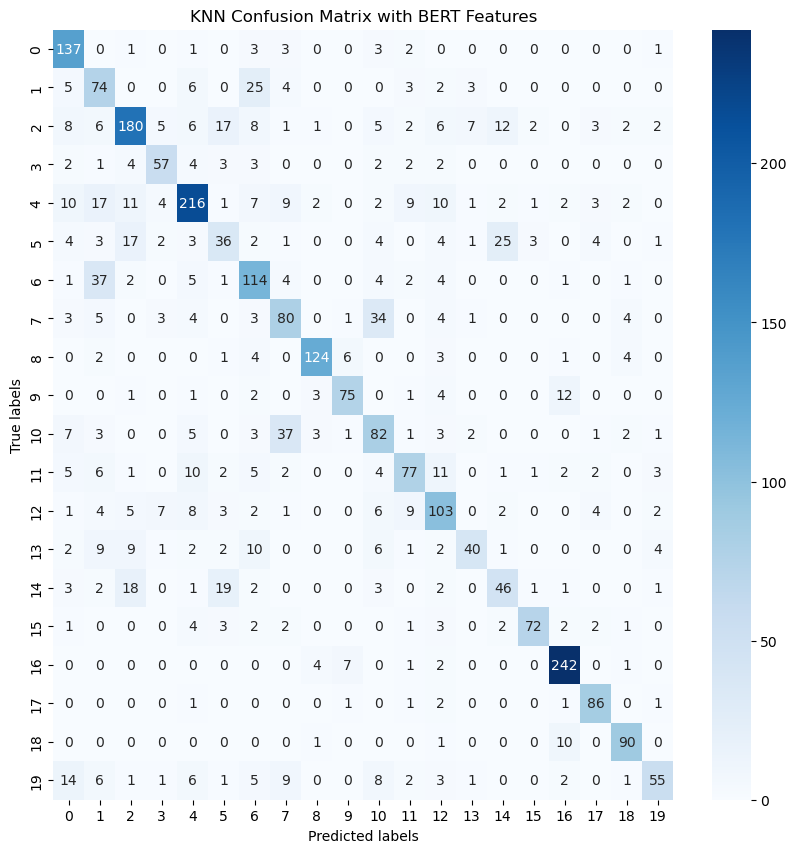

In [12]:
# Get the confusion matrix
rf_classifier.get_confusion_matrix(X_test, y_test, 'KNN Confusion Matrix with BERT Features')